## Assignment B - Determine the best total numbers of clusters

#### Extract the Image dimensions for the downloaded images

In [1]:
#Determine Image size
import os
from PIL import Image 

folder_images = "C:\\Users\\User\\Downloads\\Images"
size_images = dict()

for dirpath, _, filenames in os.walk(folder_images):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            width, heigth = img.size
            size_images[path_image] = {'width': width, 'heigth': heigth}

print(size_images)

{'Image_001.jpg': {'width': 201, 'heigth': 251}, 'Image_002.jpg': {'width': 275, 'heigth': 183}, 'Image_003.jpg': {'width': 197, 'heigth': 256}, 'Image_004.jpg': {'width': 800, 'heigth': 1067}, 'Image_005.jpg': {'width': 635, 'heigth': 483}, 'Image_006.jpg': {'width': 4096, 'heigth': 2160}, 'Image_007.jpg': {'width': 700, 'heigth': 700}, 'Image_008.jpg': {'width': 864, 'heigth': 1300}, 'Image_009.jpg': {'width': 272, 'heigth': 348}, 'Image_010.jpg': {'width': 225, 'heigth': 225}, 'Image_011.jpg': {'width': 248, 'heigth': 203}, 'Image_012.jpg': {'width': 590, 'heigth': 332}, 'Image_013.jpg': {'width': 268, 'heigth': 188}, 'Image_014.jpg': {'width': 660, 'heigth': 439}, 'Image_015.jpg': {'width': 866, 'heigth': 1300}, 'Image_016.jpg': {'width': 3008, 'heigth': 1960}, 'Image_017.jpg': {'width': 984, 'heigth': 659}, 'Image_018.jpg': {'width': 962, 'heigth': 667}, 'Image_019.jpg': {'width': 440, 'heigth': 550}, 'Image_020.jpg': {'width': 754, 'heigth': 425}, 'Image_021.jpg': {'width': 1546,

In [2]:
#Import the dimensions to Dataframe and then csv
import pandas as pd

df=(pd.DataFrame(size_images)).transpose()
df['filename']=df.index
df.reset_index(inplace=True)
del df['index']
print(df)

     heigth  width       filename
0       251    201  Image_001.jpg
1       183    275  Image_002.jpg
2       256    197  Image_003.jpg
3      1067    800  Image_004.jpg
4       483    635  Image_005.jpg
5      2160   4096  Image_006.jpg
6       700    700  Image_007.jpg
7      1300    864  Image_008.jpg
8       348    272  Image_009.jpg
9       225    225  Image_010.jpg
10      203    248  Image_011.jpg
11      332    590  Image_012.jpg
12      188    268  Image_013.jpg
13      439    660  Image_014.jpg
14     1300    866  Image_015.jpg
15     1960   3008  Image_016.jpg
16      659    984  Image_017.jpg
17      667    962  Image_018.jpg
18      550    440  Image_019.jpg
19      425    754  Image_020.jpg
20     1056   1546  Image_021.jpg
21     1200   2000  Image_022.jpg
22      472    840  Image_023.jpg
23      687   1374  Image_024.jpg
24     1079   1440  Image_025.jpg
25      348    620  Image_026.jpg
26      600    900  Image_027.jpg
27      183    275  Image_028.jpg
28      667   

In [3]:
df.to_csv(r'C:\Users\User\Downloads\Imagesize.csv', index=False)

In [6]:
import numpy as np
from matplotlib import pyplot as plt
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [7]:
#Read the Image Annotation CSV file
df_annot=pd.read_csv(r'C:\Users\User\Downloads\EVA5-ImageAnnotation_S12.csv') 
df_annot.head()

,filename,file_size,Image_Width,Image_Height,region_count,region_id,region_attributes,bbox_x,bbox_y,bbox_width,bbox_height,file_attributes
0,Image_001.jpg,10356,201,251,1,0,mask,35,44,150,173,"{""caption"":"""",""public_domain"":""no"",""image_url""..."
1,Image_002.jpg,9001,275,183,2,0,mask,55,81,80,76,"{""caption"":"""",""public_domain"":""no"",""image_url""..."
2,Image_002.jpg,9001,275,183,2,1,hardhat,36,4,170,114,"{""caption"":"""",""public_domain"":""no"",""image_url""..."
3,Image_003.jpg,5314,197,256,1,0,mask,24,100,146,109,"{""caption"":"""",""public_domain"":""no"",""image_url""..."
4,Image_004.jpg,81395,800,1067,1,0,mask,131,243,538,498,"{""caption"":"""",""public_domain"":""no"",""image_url""..."


In [28]:
#Normalize the Bounding Boxes dimensions
df_annot['bbox_width_norm']=df_annot['bbox_width']/df_annot['Image_Width']
df_annot['bbox_height_norm']=df_annot['bbox_height']/df_annot['Image_Height']
df_annot['bbox_width_norm_log']=np.log(df_annot['bbox_width_norm'])
df_annot['bbox_height_norm_log']=np.log(df_annot['bbox_height_norm'])

In [68]:
df_annot[['filename','Image_Width','Image_Height','bbox_width_norm','bbox_height_norm','bbox_width_norm_log','bbox_height_norm_log']].head()

,filename,Image_Width,Image_Height,bbox_width_norm,bbox_height_norm,bbox_width_norm_log,bbox_height_norm_log
0,Image_001.jpg,201,251,0.746269,0.689243,-0.292670,-0.372161
1,Image_002.jpg,275,183,0.290909,0.415301,-1.234744,-0.878753
2,Image_002.jpg,275,183,0.618182,0.622951,-0.480973,-0.473288
3,Image_003.jpg,197,256,0.741117,0.425781,-0.299597,-0.853830
4,Image_004.jpg,800,1067,0.672500,0.466729,-0.396753,-0.762006


Text(0,0.5,'Log(Normalized) Height')

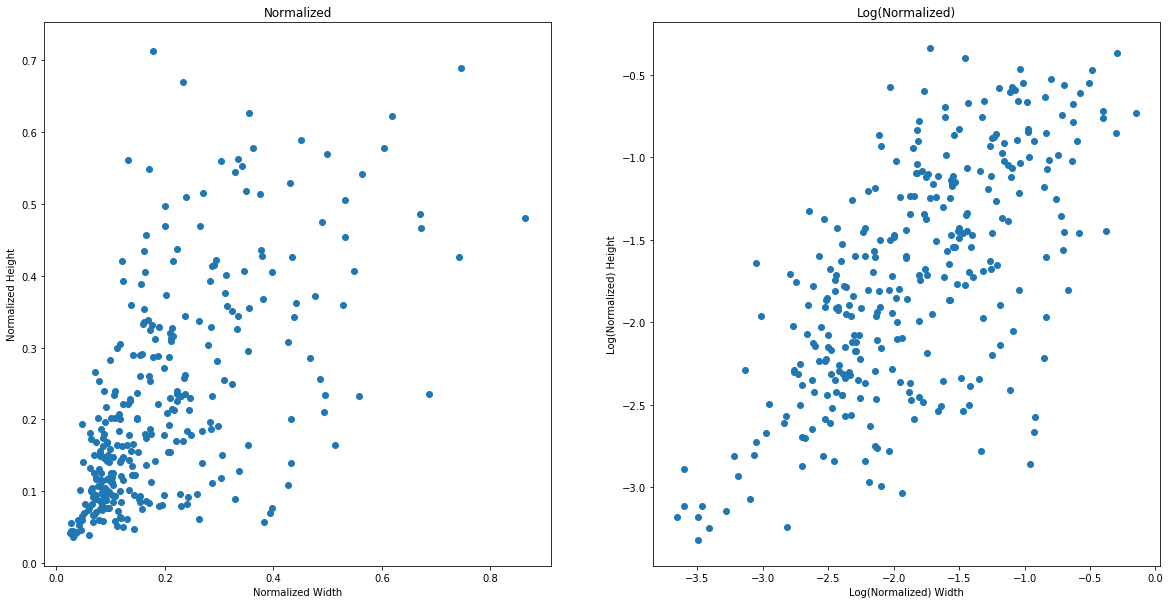

In [41]:
#Plotting the normalized Width and Height
x1=df_annot['bbox_width_norm']
y1=df_annot['bbox_height_norm']

x2=df_annot['bbox_width_norm_log']
y2=df_annot['bbox_height_norm_log']

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.scatter(x1, y1)
ax1.set_title('Normalized')
ax1.set_xlabel('Normalized Width')
ax1.set_ylabel('Normalized Height')
ax2.scatter(x2, y2)
ax2.set_title('Log(Normalized)')
ax2.set_xlabel('Log(Normalized) Width')
ax2.set_ylabel('Log(Normalized) Height')

## K Means clustering for Normalized Width and Height

In [59]:
X=df_annot[['bbox_width_norm','bbox_height_norm']]

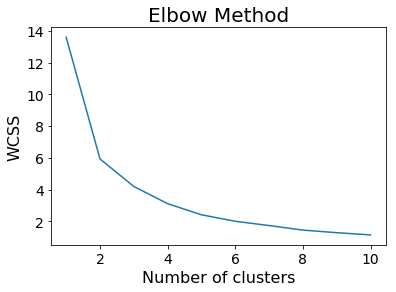

In [60]:
#K Means clustering for Normalized Width and Height
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=16)
plt.ylabel('WCSS',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

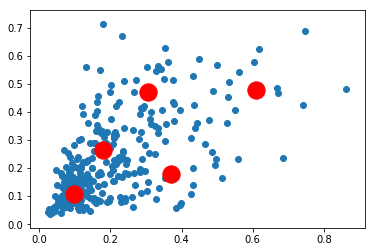

In [61]:
# Optimum number of cluster based on above graph is 5

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [62]:
X1=df_annot[['bbox_width_norm_log','bbox_height_norm_log']]

## K Means clustering for Normalized Log Transformed Width and Height

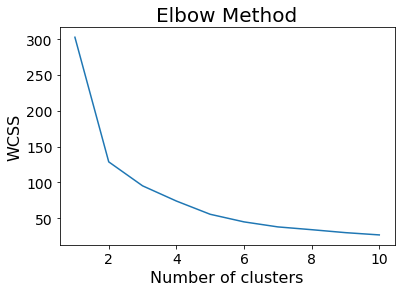

In [63]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=16)
plt.ylabel('WCSS',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

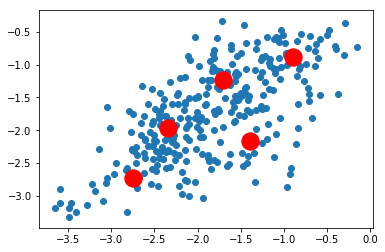

In [67]:
# Optimum number of cluster based on above graph is 5

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X1)
plt.scatter(X1.iloc[:,0], X1.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()